# Modeling: Clustering Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import sklearn.preprocessing

import wrangle
np.random.seed(4)

iris = wrangle.get_iris_data()

In [2]:
iris.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


## Exercise 1)
Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [3]:
#naming features as X for clustering
X = iris[['petal_width', 'sepal_width']]

In [4]:
#creating the KMeans model, fitting the model then predicting with it
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
#storing this predicted cluster of data into original dataframe
iris['cluster'] = kmeans.predict(X)

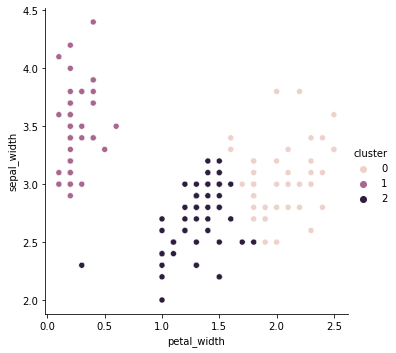

In [6]:
#Now Visualizing the clusters predicted, using 'cluster' as hue to show the 3 clusters
sns.relplot(data=iris, x='petal_width', y='sepal_width', hue='cluster')

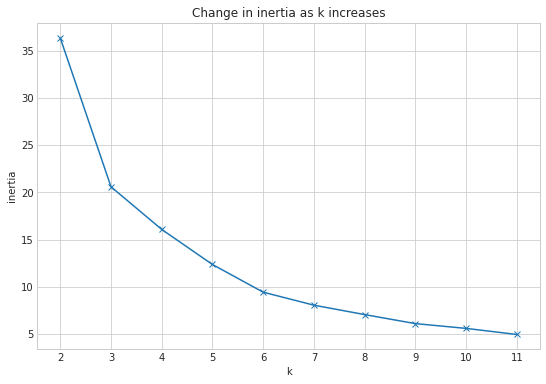

In [7]:
#choosing a good method for what k to use: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


### Takeaway:
- good choice for k could be 3-4 or even 4-5

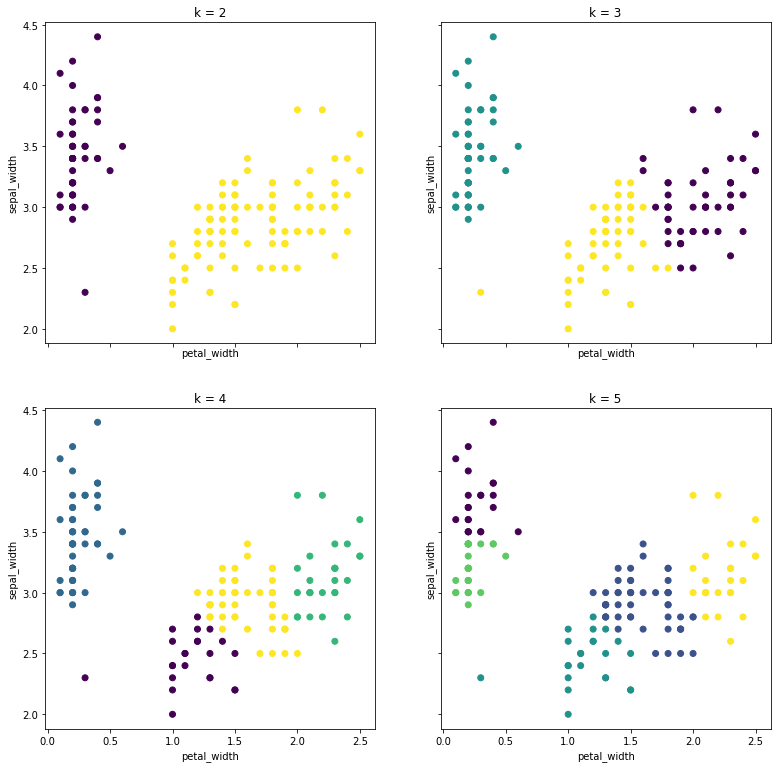

In [8]:
#plotting one more time, to check if the k guesses above are correct
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal_width', ylabel='sepal_width')


### Takeaway: 
I'll be using k of 3 as the elbow method and the above subplots show is the best choice.

_______________________________________________________________________________________________________________

### Choice 2: sepal_width & petal_length

In [9]:
#naming features as X for clustering
X = iris[['sepal_width', 'petal_length']]

In [10]:
#creating the KMeans model, fitting the model then predicting with it
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [11]:
#storing this predicted cluster of data into original dataframe
iris['cluster'] = kmeans.predict(X)

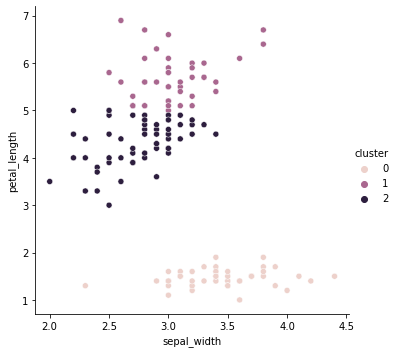

In [12]:
#Now Visualizing the clusters predicted, using 'cluster' as hue to show the 3 clusters
sns.relplot(data=iris, x='sepal_width', y='petal_length', hue='cluster')

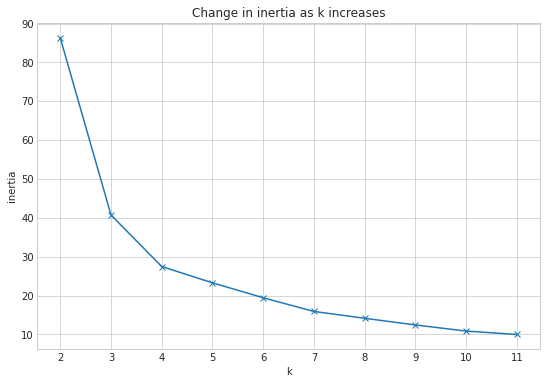

In [13]:
#choosing a good method for what k to use: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

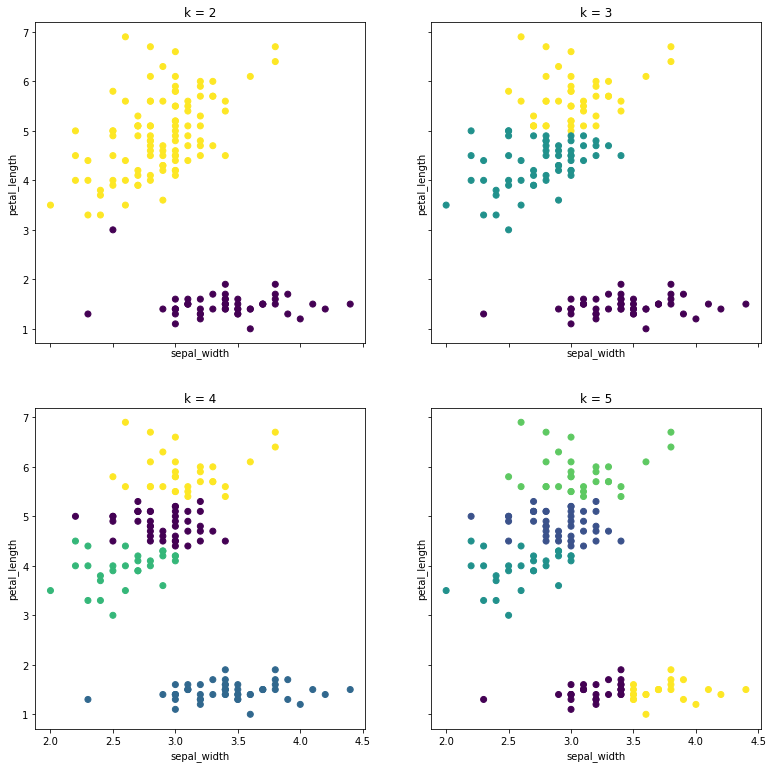

In [14]:
#plotting one more time, to check if the k guesses above are correct
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_width', ylabel='petal_length')

#### Conclusion: Again, I would go with k=3

_____________________________________________________________________________________________________________

### Choosing Features: 

In [15]:
#naming features as X for clustering
X = iris[['sepal_length', 'petal_width']]

In [16]:
#creating the KMeans model, fitting the model then predicting with it
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [17]:
#storing this predicted cluster of data into original dataframe
iris['cluster'] = kmeans.predict(X)

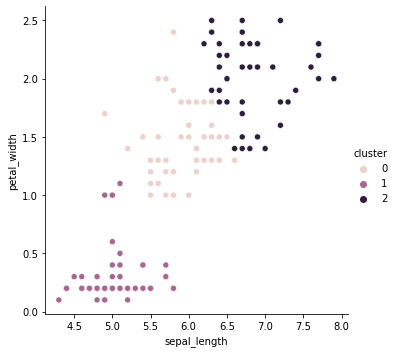

In [18]:
#Now Visualizing the clusters predicted, using 'cluster' as hue to show the 3 clusters
sns.relplot(data=iris, x='sepal_length', y='petal_width', hue='cluster')

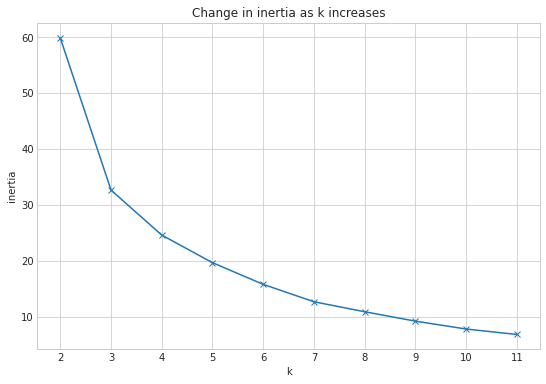

In [19]:
#choosing a good method for what k to use: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

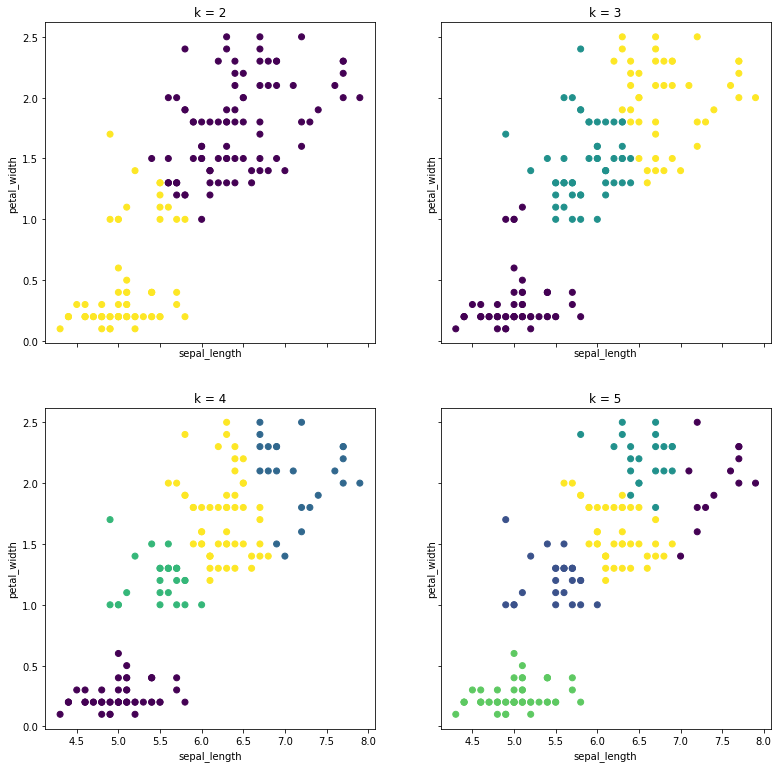

In [20]:
#plotting one more time, to check if the k guesses above are correct
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_length', ylabel='petal_width')

### Conclusion: I would actually look at 3 or even 4 for this one

___________________________________________________________________________________________________________

# Modeling: Using Mall Data

In [21]:
df = wrangle.get_mall_db()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
#naming features as X for clustering
X = df[['age', 'annual_income','spending_score']]

In [23]:
#creating the KMeans model, fitting the model then predicting with it
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [24]:
#storing this predicted cluster of data into original dataframe
df['cluster'] = kmeans.predict(X)

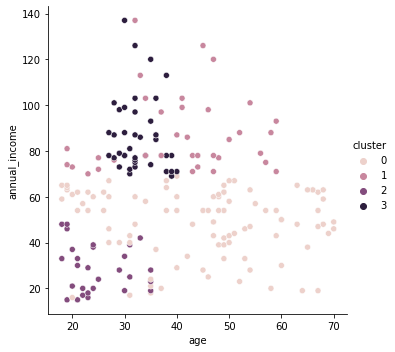

In [25]:
#Now Visualizing the clusters predicted, using 'cluster' as hue to show the 4 clusters
sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

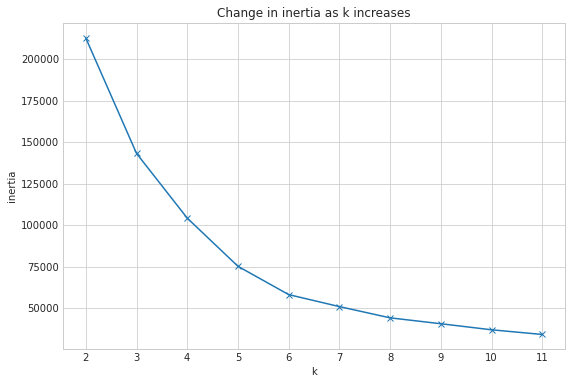

In [26]:
#choosing a good method for what k to use: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

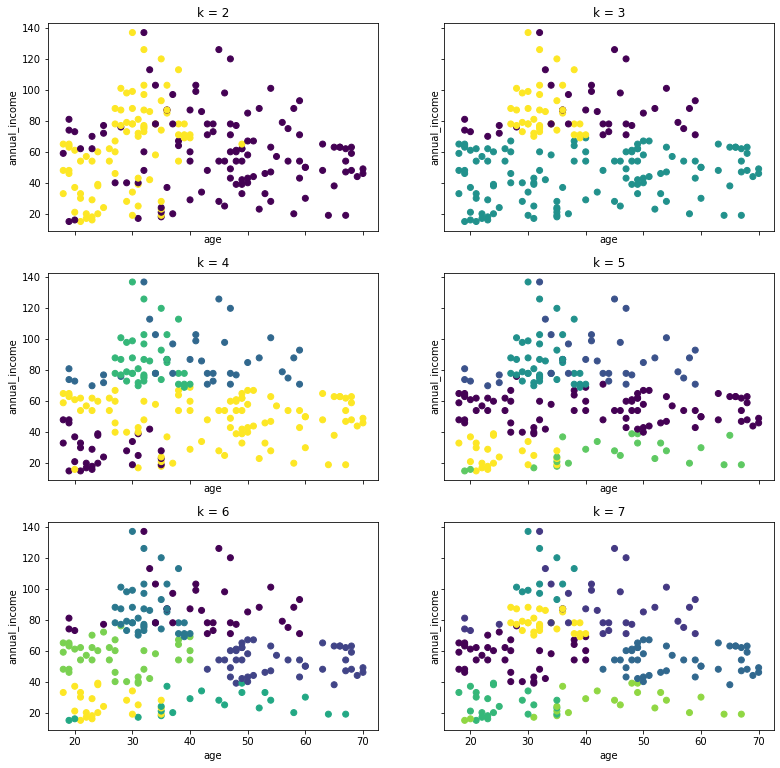

In [27]:
#plotting one more time, to check if the k guesses above are correct
fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

#### Takeaway:
This is telling me that adding in all of those 4 features isn't really helping the ML to find any sort of relationship. So I'll try a few things:
- 1) I'll encode the gender to open that up 
- 2) Comparing Annual income to Spending Score and is_female


In [28]:
#encoding gender
dummy_gender = pd.get_dummies(df['gender'])

#merging back into df
df = pd.merge(
    left=df,
    right=dummy_gender,
    left_index=True,
    right_index=True,
)

In [29]:
df.head(1)
#I forgot to make the encode be is_male...but I'll go with this for now

,customer_id,gender,age,annual_income,spending_score,cluster,Female,Male
0,1,Male,19,15,39,2,0,1


### Comparing Annual Income to Spending Score:

In [30]:
#naming features as X for clustering
X = df[['annual_income','spending_score', 'Female', 'Male']]

In [31]:
#creating the KMeans model, fitting the model then predicting with it
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [32]:
#storing this predicted cluster of data into original dataframe
df['cluster'] = kmeans.predict(X)

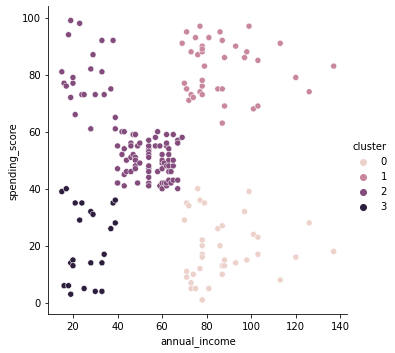

In [33]:
#Now Visualizing the clusters predicted, using 'cluster' as hue to show the 4 clusters
sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster')

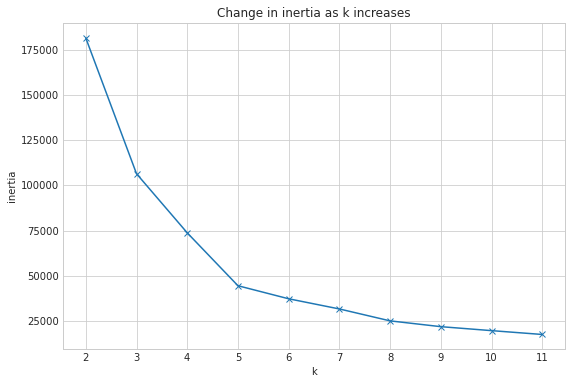

In [34]:
#choosing a good method for what k to use: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

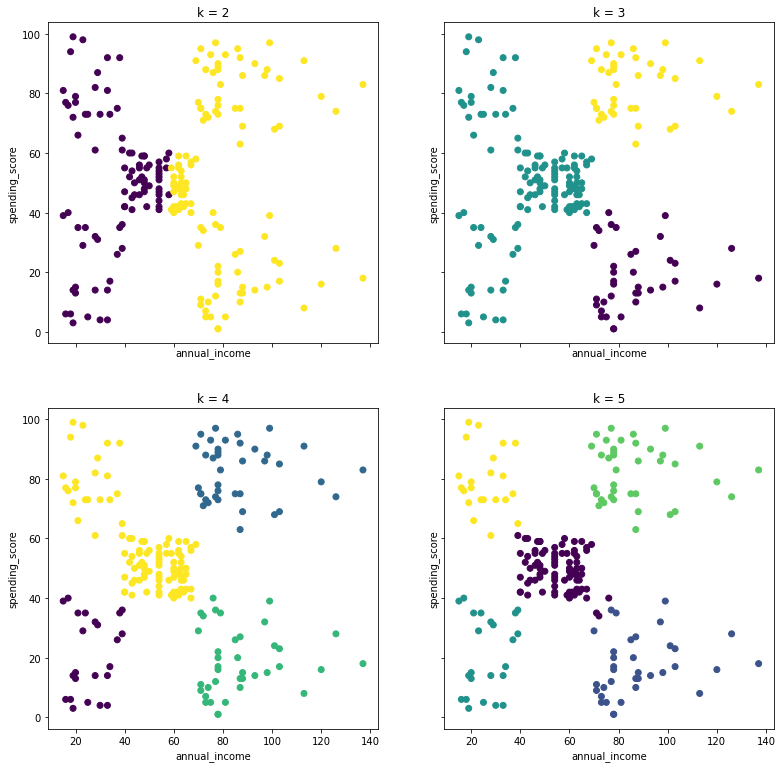

In [35]:
#plotting one more time, to check if the k guesses above are correct
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

### Takeaway:
This is showing that using k=2 or even k=5 would work best.

### Showing Scaled vs Unscaled data:

In [36]:
#checking dtypes
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
cluster            int32
Female             uint8
Male               uint8
dtype: object

In [37]:
#changing Female and Male dtypes
df['Female'].astype('int')

df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
cluster            int32
Female             uint8
Male               uint8
dtype: object

In [38]:
#splitting to have unscaled and then later will scale on copy of train, validate, test
#unscaled split dataset:

# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)


In [39]:
#dropping gender due to string values
train = train.drop(columns=['gender'])
validate = validate.drop(columns=['gender'])
test = test.drop(columns=['gender'])

In [40]:
train.head()

,customer_id,age,annual_income,spending_score,cluster,Female,Male
123,124,39,69,91,1,0,1
76,77,45,54,53,2,1,0
171,172,28,87,75,1,0,1
10,11,67,19,14,3,0,1
35,36,21,33,81,2,1,0


In [49]:
#scaling the data with MinMaxScaler

scaler = sklearn.preprocessing.MinMaxScaler()

x_train = train.copy()
x_validate = validate.copy()
x_test = test.copy()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

In [50]:
#using scaled dataset for clustering:
#naming features as X for clustering
X = x_train[['annual_income','spending_score', 'Female', 'Male']]

In [51]:
#creating the KMeans model, fitting the model then predicting with it
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 3, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 3, 2, 0, 0, 1, 2, 0, 2, 1, 3, 1, 1, 1, 2, 3, 3, 3,
       3, 0, 2, 1, 2, 0, 1, 3, 1, 1, 1, 1, 2, 2, 1, 3, 1, 3, 1, 1, 1, 1,
       3, 1, 0, 0, 2, 3, 3, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 3, 3, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3,
       1, 1], dtype=int32)

In [52]:
#storing this predicted cluster of data into original dataframe
x_train['cluster'] = kmeans.predict(X)

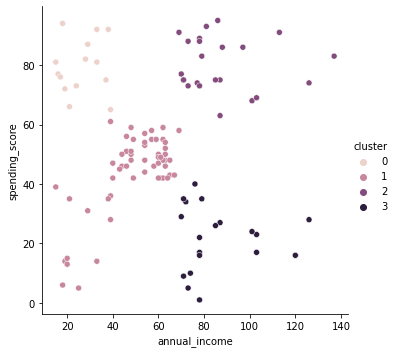

In [54]:
#Now Visualizing the clusters predicted, using 'cluster' as hue to show the 4 clusters
sns.relplot(data=x_train, x='annual_income', y='spending_score', hue='cluster')

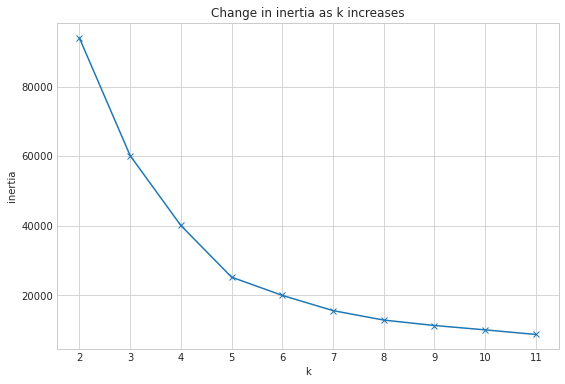

In [55]:
#choosing a good method for what k to use: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

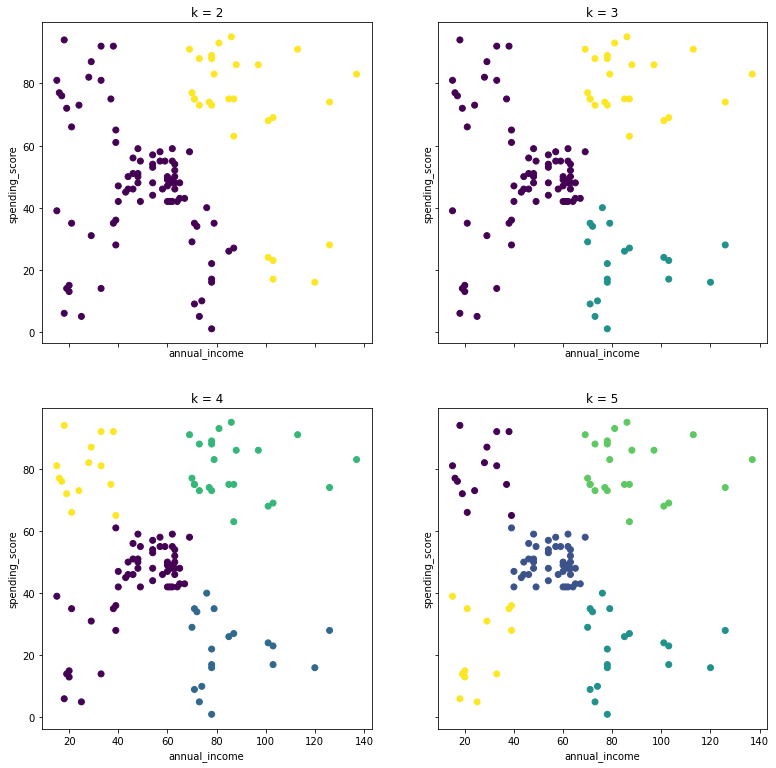

In [56]:
#plotting one more time, to check if the k guesses above are correct
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

### Takeaway:
By using scaled data, the clustering seems to shift where lower quadrants are being easier to identify (or there is more data in the lower annual_income area) and k5 looks much cleaner (no random other colored dots in each cluster)